# Challenges in ML

"Machine learning is not rocket science, until you implement it" 

-Anonymous


Machine learning is one of the most interesting and intuitive concepts to learn but when dealing with real business data there comes certain challenges that a data scientist will have to figure out how to resolve.

In this module, we will try to understand few of the common ML challenges and ways of overcoming them.

## Overview:

* What is Imbalanced Data


* Dealing with imbalanced data
    * Evaluation Metrics
    * Resampling Techniques
    * Algorithmic Techniques


* Dealing with small datasets


* Values of K in K-Fold validation


* Do we need hundreds of classifiers?


## Chapter 1: Black Art of Machine Learning

### Description: This chapter will discuss few of the less discussed topics in ML textbooks which a practioner usually deals with on a daily basis

### 1.1 Generalization of ML algorithms

***

Every machine learning algorithm can figure out how to perform important tasks by generalizing from examples. And this is often feasible and cost-effective than manual programming. With more availablilty of data, more ambitious problems can be tackled as a result of which the applications of machine learning is increasingly widely beyond the field of computer science. However, developing successful machine learning applications requires a substantial amount of "black art".

One such hot topic is the **generizability** of ML algorithms. The fundamental goal of any ML algorithm is to perform well on unseen data, or in other words it should generalize well. To achieve it, one should **properly** set up development and test sets. 

Before the modern era of big data, it was a common rule in machine learning to use a random 70/30 split for training and test sets. This practice can work, but it's a bad idea for production grade ML algorithms. The purpose of the three splits viz. Training, Dev (Development) and Test sets:

- __*Training set*__: Dataset where you run your learning algorithm on.
- __*Dev (development) set*__: Dataset where you use to tune parameters, select features, and make other decisions regarding the learning algorithm (sometimes also called the hold-out cross validation set).
- __*Test set*__: Dataset where you use to evaluate the performance of the algorithm, but not to make any decisions regarding what learning algorithm or parameters to use


So, the **Dev** and **Test** sets will contribute a lot towards making the most important changes to your learning algorithm. With this thing in mind always: **"Choose dev and test sets to reflect data you expect to get in the future and want to do well on"** i.e. development and test sets must come from the same distribution. 

Lets take an example for this kind of scenario where your learning algorithm is performing well on the Dev set but on test set yields very poor results. What could have gone wrong? Multiple reasons are possible:
- Overfitting is happening on dev set
- Test set is harder than test set; in which case the algorithm is doing best but cannot improve further
- The test set is different than the dev set. This scenario is the worst where one can spend lots of hours without improving the algorithmic performance.


**Size of Dev and Test set**

Another criteria while chosing dev and test sets is their size. In general, the size of the dev set should be big enough to detect performance differences between the algorithms that you are trying. For example, if classifier A has an accuracy of 90% and classifier B has an accuracy of 90.1%, then a dev set of 100 examples might not be able to detect this 0.1% difference. Another thing to ponder on is a 0.1% increase in peformance really desired? For companies dealing in advertisements, recommendations etc. this increase can drive significant revenues. But for research problems, this increase is not substantial at all and other avenues are often encouraged.


**More data usually beats a cleverer algorithm**

Situations may arise where you have to choose between more data and a more complex algorithm. Although you might be tempted to go with a more complex model, the more pragmatic choice is to add more training instances. As a rule of thumb, a dumb algorithm with lots and lots of data beats a clever one with modest amounts of it. Scalability is another issue that pops up with increase of data. Even though in principle more data means that more complex classifiers can be learned, in practice simpler classifiers wind up being used, because complex ones take too long to learn.

### 1.2 No Free Lunch

***

A machine learning model is a simplified representation of reality, and the simplifications are made to discard unnecessary detail and allow us to focus on the aspect of reality that we want to understand. However, these simplifications are grounded on some assumptions; these assumptions may hold in some situations, but may not hold in other situations. This implies that a model that explains a certain situation well may fail in another situation. That is why in both statistics and machine learning, we need to check our assumptions before relying on a model. And this is the very premise of the No Free Lunch Theorem


**Statement of No Free Lunch Theorem (NFLT)**

The **No Free Lunch Theorem** states that there is no one model that works best for every problem. Its essentially a proof that, averaged over all problems, no optimization algorithm is expected to perform better than any other search/optimization algorithm. The assumptions of a great model for one problem may not hold for another problem, so it is common in machine learning to try multiple models and find one that works best for a particular problem.


**High level overview**

The NLFT are a set of mathematical proofs and general framework that explores the connection between general-purpose algorithms that are considered "black-box" and the problems they solve. Many people often misunderstand it as it implies that there is not one single algorithm whose performance when averaged over every problem performs better than a random search. 

What it essentially implies is that one algorithm that searches for an optimal cost or fitness solution is not universally superior to any other algorithm. This is due to the huge potential problem space for the application of the general-purpose algorithm; if an algorithm is particularly adept at solving one class of problem, and the fitness surface that comes with it, then then it has to perform worse on the remaining average of problems. 

For ex: Suppose regression was your end goal and the data perfectly satisfies the assumptions of linear regression; then linear regression will do a great job at it while some complex model may perform worse. However, on another data source one may find out that a complex model like neural network satisfactorily outperforms any ML algorithm. 

Wolpert and Macready wrote in their paper, `No Free Lunch Theorems for Optimisation`:

> “If an algorithm performs better than random search on some class of problems then in must perform worse than random search on the remaining problems.”

<img src='../images/nlft.png'>

### 1.3 Overfitting in high dimensional data

***

Probably the biggest problem after overfitting in machine learning is the curse of dimensionality. This expression was coined by Bellman in 1961 to refer to the fact that many algorithms that work fine in low dimensions become intractable when the input is high-dimensional.

Lets take a sample use case where your goal is to build a classifier that classfies images as either cats or dogs. Also, you know that the color of the images is one key differentiator. 

So, you begin by taking the mean value of red color of the images as a single feature. So, you have a single feature and you decide to build a linear classifier with its help. Lets see how the decision boundary works:

<img src='../images/1.png'>

Since taking only one feature doesn't result in good partitioning, you decide to add another feature; the mean green color in the image. Lets see how this turns out:

<img src='../images/2.png'>

Still you are facing issues with classification and so you decide to add another feature this time; the mean value of blue color in the image. This turns out somewhat like this:

<img src='../images/3.png'>

In the three-dimensional feature space, you can now find a plane that perfectly separates dogs from cats. This means that a linear combination of the three features can be used to obtain perfect classification results for our case.

<img src='../images/plane.png'>


**Will performance keep increasing with increase in number of features?**

Going by the cat-dog classifier logic, you might be tempted to think that as we go adding new features, the performance would increase. However, this is not the case and the performance actually goes down. 

This is due to overfitting as in higher dimensions the probability of finding a separable hyperplane is much more for the same number of training examples as compared to that of a hyperplane in a lower dimension. Again this is quite intuitive because the feature space (equal to number of dimensions) increases on addition of features but training data remains the same. This introduces a lot of sparsity in our feature space and for this reason it becomes much more easy to find a separable hyperplane because the likelihood that a training sample lies on the wrong side of the best hyperplane becomes infinitely small when the number of features becomes infinitely large. 

The performance varies with the number of dimensions as shown in the graph below i.e. performance increase only till you reach a certain optimal number of dimensions, then it starts reducing due to overfitting. 

<img src='../images/graph.png'>



**How to avoid this overfitting problem?**

A possible turnaround is to add more number of training examples. Lets understand how. Lets say we want to train a classifier using only a single feature whose value ranges from 0 to 1. Lets also assume that this feature is unique for each cat and dog. 

*With single feature*

If we want our training data to cover 20% of this range, then the amount of training data needed is 20% of the complete population of cats and dogs. 

*With two features*

Now, if we add another feature, resulting in a 2D feature space, things change; To cover 20% of the 2D feature range, we now need to obtain 45% of the complete population of cats and dogs in each dimension (0.45^2 = 0.2).

*With three features*

In the 3D case this gets even worse: to cover 20% of the 3D feature range, we need to obtain 58% of the population in each dimension (0.58^3 = 0.2).

The phenomenon described by these three situations is appropriately summed up in the picture below. **So, the only way to avoid overfitting is by adding more number of training examples so that sparsity is not introduced.**

<img src='../images/curse.png'>

### 1.4 Intuition fails in higher dimensions

***

From the previous topic you know that as the number of features (dimensions) increases, there needs to be an exponential increase in the number of training examples in order to curb the problem of sparsity which can lead to overfitting if not dealt with properly. 

However, there is another problem with high dimensional data; **data is not distributed uniformly across all dimensions**. **In fact, data around the origin (at the center of the hypercube) is much more sparse than data in the corners of the search space**. This can be understood as follows:

Imagine a unit square that represents the 2D feature space. The average of the feature space is the center of this unit square, and all points within unit distance from this center, are inside a unit circle that inscribes the unit square. The training samples that do not fall within this unit circle are closer to the corners of the search space than to its center. These samples are difficult to classify because their feature values greatly differs (e.g. samples in opposite corners of the unit square). Therefore, classification is easier if most samples fall inside the inscribed unit circle, illustrated by figure below:

<img src='../images/circle.png'>


An interesting question is now how the volume of the circle (hypersphere) changes relative to the volume of the square (hypercube) when we increase the dimensionality of the feature space. The volume of a unit hypercube of dimension d is always  $1^d = 1$ . The volume of the inscribing hypersphere of dimension d and with radius 0.5 can be calculated as:

<img src='../images/eq.png'>

<img src='../images/gp.png'>

As seen from the above equation and the graph, the volume of the hypersphere tends to zero as the dimensionality tends to infinity, whereas the volume of the surrounding hypercube remains constant. This surprising and rather counter-intuitive observation partially explains the problems associated with the curse of dimensionality in classification: **In high dimensional spaces, most of the training data resides in the corners of the hypercube defining the feature space**. And as mentioned before, instances in the corners of the feature space are much more difficult to classify than instances around the centroid of the hypersphere.

<img src='../images/wow.png'>

The above image shows a 2D unit square, a 3D unit cube, and a creative visualization of an 8D hypercube which has 2^8 = 256 corners. For this 8-dimensional hypercube, about 98% of the data is concentrated in its 256 corners (found from the equation above). As a result, when the dimensionality of the feature space goes to infinity, the ratio of the difference in minimum and maximum Euclidean distance from sample point to the centroid, and the minimum distance itself, tends to zero: <img src='../images/eq_2.png'>

Therefore, distance measures start losing their effectiveness to measure dissimilarity in highly dimensional spaces. Since classifiers depend on these distance measures (e.g. Euclidean distance, Mahalanobis distance, Manhattan distance), classification is often easier in lower-dimensional spaces where less features are used to describe the object of interest.


**How to avoid curse of dimensionality?**

As already seen above, the performance of a classifier decreases when the dimensionality of the problem becomes too large. The question then is what **too large’ means, and how overfitting can be avoided**. Regrettably there is no fixed rule that defines how many feature should be used in a classification problem. In fact, this depends on the amount of training data available, the complexity of the decision boundaries, and the type of classifier used.

Some rules of thumb that you can follow are as follows:
- *Training instances should be increased with addition of new features*: The smaller the size of the training data, the less features should be used. If N training samples suffice to cover a 1D feature space of unit interval size, then  $N^2$  samples are needed to cover a 2D feature space with the same density, and  $N^3$  samples are needed in a 3D feature space. In other words, the number of training instances needed grows exponentially with the number of dimensions used.
- *Dimensionality should be kept low for algorithms with high variance*: Classifiers that tend to model non-linear decision boundaries very accurately (e.g. neural networks, KNN classifiers, decision trees) do not generalize well and are prone to overfitting. Therefore, the dimensionality should be kept relatively low when these classifiers are used.
- *Dimensionality can be kept higher for algorithms with high bias*: For classifiers that generalize easily (e.g. naive Bayesian, linear classifier), the number of used features can be higher since the classifier itself is less expressive.
- *Using feature selection techniques*: Use feature selection techniques like correlation, chi-square etc. to reduce the number of dimensions. Essentially what it achieves is select M features from a set of N features. 
- *Replace features by combination of features*: You can also try replacing set of N features by a set of M features, each of which is a combination of the original feature values. A very well known dimensionality reduction technique that yields uncorrelated, linear combinations of the original N features is Principal Component Analysis (PCA).
- *Cross-validation techniques*: If the classification results on the subsets used for training greatly differ from the results on the subset used for testing, overfitting is in play. Several types of cross-validation such as k-fold cross-validation and leave-one-out cross-validation can be used if only a limited amount of training data is available.

### 1.5 Model interpretability

***

**What is interpretability and why is it important?**

The use cases of ML algorithms are increasing day-by-day and along with that the impacts (direct or indirect) is increasing too. Naturally, the more a machine's decision affects a human's life, the more important it will be for the machine to explain its behaviour. So, interpretibility can be defined as **"Interpretability is the degree to which a human can understand the cause of a decision"**. 


**Interpretability helps in debugging and auditing ML models**

Take the case of an ML model that decides on whether to approve loan applications or not. Due to some reasons, you suddenly find out that this model is biased towards one section of the society. Defintely you would want to avoid such a situation and debugging your model with the help of interpretibility can help you in finding out where your model is doing wrong. Even during production (assuming everything works fine before), your model might go wrong and starts discriminating. 

Interpreting a model can guide you as to where the model is making incorrect decisions and why is it doing so.


**Interpretability for social acceptance**

The process of integrating machines and algorithms into our daily lives demands interpretability to increase social acceptance. In a fast moving business world where decisions need to be taken quickly, a more interpretable model which explains the decision making process thoroughly will triumph over a very complex one with little or no interpretibility.

### 1.6 Data Imbalance

***

Spend enough time doing Machine Learning problems and you will definitely come across datasets having imbalanced data distribution. In imbalanced data, majority classes dominate over minority classes. In other words, number of observations belonging to one class are significantly higher(or lower) than the other class(es).

Since most machine learning algoriths assume that data is equally distributed, applying them on imbalanced data often results in bias towards majority classes and poor classification of minority classes. That's why classical data imbalance problem is recognized as one of the major problems in the field of machine learning.

Imbalanced datasets frequently occur in

* Anomaly detection
    * Fraudulent transactions in banks
    * Electricity pilferage
    
* Predicting Rare events
    * Ad click-through-rate (CTR) prediction (~1%)
    * Identification of rare diseases
    * User Churn (for example, user churn is ~2% in telecom industry)

Let's look at detection of credit card fraud to understand this in more detail.


**Credit Card Fraud Detection**

Credit card fraud is a widespread problem and accounts for millions of dollars in loss.But, given the extremely high number of credit card transactions everyday, fraudulent transactions represent only a small fraction.

Even then, fraudulent transactions have an outsized impact on the revenue, because almost the entire value of a fraudulent transaction counts towards loss (less insurance), whereas the profit from a genuine transaction is a fraction of the total transaction value.

Thus it's more important to recall fraudulent transactions, even if that means we'll end up labeling some genuine transactions as fraud. 

Even though the typical datasets recording credit card transaction are very large (millions of row), the number of fraudulent records tend to be a very small fraction of the datasets - around 1% to 2%.
Thus, if a given dataset of credit card transactions has a million row, only about 10,000 of them will be from fraudulent transactions.

So why do machine learning models fail to predict the credit card frauds?


**Bias in the model towards dominant class**

Most machine learning models will end up predicting most of the transactions as genuine as they end up learning from mostly positive instances.

Think of a scenario where you decide to go camping in a forest for two weeks. When you reach there, you find out that the forest is one of the largest habitat for snakes. During your first week, you do encounter lot of snakes and therefore become wary of them. In the next week, owing to rainfall, snakes sighting becomes less. Unfortunately though, you also become wary of long sticks and twigs. 

That is because you have formed a bias towards snakes(majority class) and end up labeling long twigs(minority class) as snakes


**Difficulty in assessing model performance**

For the credit card dataset discussed before, if we classify all transactions as genuine, we might still have an accuracy of 99%! (Bias towards dominant class)

Let's look at a problem we are more likely to encounter in practice. 

Suppose we have built two models, A and B, to predict fraudulent transactions, and we want to select the one with better performance.


**Model A**

* Of the 99% genuine transactions, this model predicts 98.5% correctly
* Of the 1% fraudulent transactions, this model predicts 0.25% correctly

**Model accuracy: 98.75%**


**Model B**

* Of the 99% genuine transactions, this model predicts 98.25% correctly
* Of the 1% fraudulent transactions, this model predicts 0.5% correctly

**Model accuracy: 98.75%**

* **Which of these two models performs better?**
* **Which one of these two should we use?**


* Clearly Model B is more valuable to us, but Accuracy, one of the most common metrics used in classification, fails to reflect that.

* We need to use a metric that not only captures the class imbalance better, but one that also lets us make meaningful trade-offs between precision and recall.


**Dealing with Imbalanced Data**

Following are some of the ways to handle the imbalanced data:

* More suited error metrics (comparatively immune to class imbalance)

* Undersampling

* Oversampling

* Algorithmic techniques

* Buy/Collect more data

You will learn more about undersampling, oversampling and algorithmic techniques in the upcoming chapters.

# Chapter 2: Better error metrics?

## 2.1 Different error metrics

The idea is to choose an error metric that is immune to class imbalance. As we saw earlier, accuracy is something that is not very robust against class imbalance. Following are a few examples of such error metrics

* Confusion Matrix


* Precision / Recall 


* F1 Score


* AUC ROC


* Cohen's Kappa


We have already gone through all the metrics, except Cohen's kappa. 
Nevertheless let's refresh them one by one
***
**Confusion Matrix**

The confusion matrix is a handy presentation of the accuracy of a model with two or more classes.

Below is an example of a Confusion Matrix for our credit card fraud.



| Value | Fraud  | Not Fraud |
|---|---|---|
| Predicted Fraud | 1 | 1 |
| Predicted Not Fraud | 2 | 996 |

Here,

- **TP** = 1 i.e. actual **Fraud** and also predicted **Fraud**.

- **FP** = 1 i.e. actual **Not Fraud** but predicted **Fraud**.

- **FN** = 2 i.e. actual **Fraud** but predicted **Not Fraud**.

- **TN** = 996 i.e. actual **Not Fraud** and predicted **Not Fraud**.

***
**Precision**

For every predicted class, it is the fraction of the correct predictions to the total number of predictions for that class. It answers the question **Of all the values predicted as belonging to the class "X", what percentage is correct?** Mathematically,

$$ Precision(P) = \frac{TP}{TP + FP}$$

The precision in our example would be = $\frac{1}{1 + 1} = \frac{1}{2} = 0.5 $

***
**Recall**

For every actual class, it is the fraction of the number of correct predictions to the total number of actual instances of the class. It answers the question **Of all the instances of the class "X", what percentage did we predict correctly?** Mathematically,        

$$ Recall(R) = \frac{TP}{TP + FN}$$

The recall in our previous example is = $\frac{1}{1 + 2} = \frac{1}{3} = 0.34$

**Precision-Recall Tradeoff**

Suppose two models: Model 1 and Model 2 are implemented on the credit fraud dataset. 

Following are the observations:

* Model 1 is able to correctly predict `0`[Not Fraud] better than Model 2. Thereby Model 1 has lesser False Positives, thereby higher Precision 

* Model 2 is able to correctly predict `1`[Not Fraud] better than Model 1. Thereby Model 2 has lesser False Negatives, thereby higher Recall.

Which model should we choose?

This situation is what is known as **Precision-Recall Tradeoff!**
For a given model, it is always possible to increase either statistic at the expense of the other.

Choosing the preferred combination of precision and recall can be considered equivalent to sliding a dial between more or less conservative predictions (i.e. recall-focused vs. precision-focused). 

In the context of binary classification, examples are either positive or negative.

The recall addresses the question: "Given a positive example, will the classifier detect it ?"

The precision addresses the question: "Given a positive prediction from the classifier, how likely is it to be correct ?"

So it depends if the focus is on positive examples or on positive predictions.

**Precision** metric is more important for situations when you are more concerned about getting absolutely correct results.

Some of the examples include:

* YouTube video recommendations : You are concerned with giving few great recommendations than many average recommendations) 

* Stock prediction : Given the chance 200 of your units will stock out, you would be happy to get a list of high precision list of 60 units most likely to stock out than a list of 400 units which will result in wastage of money and resources spent on the extra 200 units)  

**Recall** metric is more important when you really want to ensure you're definitely capturing positive cases or when the cost of missing a positive is more problematic than the cost of including a negative.

Some of the examples include:

* All disease prediction models: For eg: Not identifying a person having rare Cancer is much more fatal than accidentally identifying a healthy person having Cancer. 

* Identification of loan defaulters: The cost involved in letting a loan defaulter slip is more than the cost involved in surveying loan non-defaulters.

Another thing to note that for a given model; a better model may in fact increase both precision and recall.

 
***
Getting back to our question, between Precision and Recall, which metric would have more importance in Credit Card Fraud Detection problem of ours?

***


**Ans.** The Credit Card Company would want higher recall over precision.That is, Credit Card Company would want a list that captures all the credit card frauds.

Reason: The credit card company is ok with doing extra monitoring i.e. This list may also include cases where non fraud has been predicted as fraud(False positives).  The money spent on monitoring these already non fraud cases is worth it if we prevent just one major credit card fraud.

What if we need a model that requires both good precision and recall?

Enter `F1 Score`

***

**F1 Score**

It is the harmonic mean of the precision and recall for a classifier. Mathematically, 

$$ F score = \frac{2PR}{P + R}$$

The F-score in our case is = $\frac{2*0.5*0.34}{0.5 + 0.34} = \frac{0.34}{0.84} = 0.40$

***
**Area under ROC Curve**

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.

The AUC represents a model’s ability to discriminate between positive and negative classes.

An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

ROC is a graphical plot of **TPR** on the Y-axis and **FPR** on the X-axis


**TPR** $=\frac{TP}{TP + FN}$


**FPR** $=\frac{FP}{FP + FN}$

***
**Cohen's Kappa**

The Kappa statistic (or value) is a metric that compares an Observed Accuracy with an Expected Accuracy (random chance). 

Let's understand how Cohen's kappa is defined using a confusion matrix
![](../images/image20.png)

Here, let's say rows (A) are the predicted values and columns (B) are the actual values.

Now let's understand observed accuracy and expected accuracy.

Observed Accuracy is simply the number of instances that were classified correctly throughout the entire confusion matrix.

![](../images/image20.png)
![](../images/image19.png)



* Expected Accuracy is defined as the accuracy that any classifier would be expected to achieve by random chance.

Sounds confusing? Let's break this down.

Our classifier classifies 
* (a + b) observations as yes
* (c + d) observations as no


* Hence, the probability of a randomly chosen observation being classified as yes is (P1): (a + b) / (a + b + c + d)
* And, the probability of a randomly chosen observation being classified as no is (P2): (c + d) / (a + b + c + d)


Reality:
* (a + c) observations as yes
* (b + d) observations as no


* Hence, the probability of a randomly chosen observation being classified as yes is (P3): (a + c) / (a + b + c + d)
* And, the probability of a randomly chosen observation being classified as no is (P4): (b + d) / (a + b + c + d)

Probability of a randomly chosen sample being *CORRECTLY* classified is 

* when the classifier classifies it as yes AND it is in reality yes: P1*P3
* when the classifier classifies it as no AND it is in reality no: P2*P4

Hence, Expected probability of a randomly chosen sample being *CORRECTLY* classified is: P1 x P3 + P2 x P4


![](../images/image20.png)
![](../images/image23.png)
![](../images/image22.png)
![](../images/image21.png)


Great! now that we understand $P_o$ and $P_e$, Cohen's kappa is defined as

![](../images/image24.png)

* In essence, the kappa statistic is a measure of how closely the instances classified by the machine learning classifier matched the data labeled as ground truth, controlling for the accuracy of a random classifier as measured by the expected accuracy. 


* Not only can this kappa statistic shed light into how the classifier itself performed, the kappa statistic for one model is directly comparable to the kappa statistic for any other model used for the same classification task.


* For any arbitrary accuracy value, more the Kappa value, better the performance.

**Q:** Here is an example of 2 classifiers with given confusion matrix. Which one do you think is performing better? 

**Classifier A**

![](../images/image25.png)

**CLassifier B**

![](../images/image27.png)

**Ans:** It is apparent that for given accuracy, classifier A is doing a much better job at classifying than classifier B, which is also reflected in higher Kappa value attained by classifier A

***


## 2.2 Python implementation

Let's now deal with an actual credit card fraud dataset.

**About the dataset**
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 

Feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


# Task: Logistic Regression model

Let's create a logistic regression model for our credit card problem and check it's performance using the evaluation metrics we just discussed.

## Instructions

- Load the dataset(zipped) from path using the `"read_csv()"` method from pandas with the parameters `path=path` and `compression='zip'` and store it in a variable called `'data'`

- Store all the features of `'data'` in  a variable called `X`


- Store the target variable (`Class`) of `'data'` in a variable called `y`


- Split `'X'` and `'y'` into `X_train,X_test,y_train,y_test` using `train_test_split()` function. Use `test_size = 0.3` , `stratify=y`and `random_state = 0`

**Note:** Here we are instead of normal split, we are doing 'statrified split'.

'Stratified split' ensures that the proportion of majority class:minority class is same in both the test dataset and train dataset

Hence we have given the value `y`(our target class) to the parameter `stratify`


- Initialise a logistic regression model with `LogisticRegression()` with `random_state=0` and save it to a variable called `'model'`.


- Fit the model on the training data `'X_train'` and `'y_train'` using the `'fit()'` method.

- Store the prediction of `'X_test'` by `'model'` in a variable called `'y_pred'`


- Find out the accuracy between `X_test` and `'y_test'` using the `'score()'` method and store it in a variable called `'accuracy'`

- Find out the recall score between `y_test` and `'y_pred'` using the `'recall_score()'` method and store it in a variable called `'recall'`

- Find out the precision score between `y_test` and `'y_pred'` using the `'precision_score()'` method and store it in a variable called `'precision'`

- Find out the f1 score between `y_test` and `'y_pred'` using the `'f1_score()'` method and store it in a variable called `'f1'`

- Find out the confusion matrix between `y_test` and `'y_pred'` using the `'confusion_matrix()'` method and store it in a variable called `'confusion_mat'`



In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score

#path
path="../data/creditcard_new.zip"

#Code starts here
#Reading of data file
data= pd.read_csv(filepath_or_buffer =path,compression='zip' )


#Extracting of features
X=data.iloc[:,:-1]

#Extracting of target
y=data.iloc[:,-1]

#Stratified splitting of test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, stratify=y,random_state=0)
                                         
#Initialising model    
model = LogisticRegression(random_state=0)

#Fitting the model
model.fit(X_train, y_train)

#Making prediction of test values
y_pred=model.predict(X_test)

#Finding accuracy score
accuracy=model.score(X_test,y_test)
print("Accuracy:",accuracy)       

#Finding recall score
recall=recall_score(y_test, y_pred)
print ("recall:",recall)

#Finding precision score
precision=precision_score(y_test, y_pred)
print ("precision:",precision)

#Finding f1 score
f1=f1_score(y_test, y_pred)
print ("f1_score:", f1)

#Finding the confusion matrix
confusion_mat=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",confusion_mat)

#Code ends here

Accuracy: 0.9993270327998361
recall: 0.6949152542372882
precision: 0.8913043478260869
f1_score: 0.780952380952381
Confusion Matrix:
 [[34113     5]
 [   18    41]]


# Chapter 3:  Undersampling

## 3.1 What is Undersampling?

Resampling methods are techniques in which , we try to **reduce the proportion of the dominant class by undersampling** from it, or we try to **increase the proportion of the minor class by oversampling** from it.

However, some of the more successful approaches combine both oversampling and undersampling.

Let's have a look at them one by one.


Undersampling techniques try to balance out the classes by reducing the number of observations in the dominant classes. 

![](../images/image26.png)

There are different approaches with which you can undersample. 

Few of the popular ones include:

* Random Undersampling

* Cluster Centroids

* Tomek Links



## 3.2 Random Undersampling
***
Random undersampling is one of the most intuitive and naive methods for undersampling. This method works by randomly choosing the samples from dominant classes. 

Let's understand the random undersampling by a few examples.

**Example 1**
* Total number of observations: 1000
* Total number of classes: 2 (A, B)
* Size of class A: 975
* Size of class B: 25
* Proportion of Minor class: 2.5%

**Sampled Dataset**
* From A, select 475 points randomly
* From B, select all 25 points
* Proportion of Minor class: 5%

**Example 2**
* Total number of observations: 1000
* Total number of classes: 3 (A, B, C)
* Size of class A: 925
* Size of class B: 25
* Size of class C: 50
* Proportion of Minor classes: 2.5% (B) and 5% (C)

**Sampled Dataset**
* From A, select 425 points randomly
* From B, select all 25 points
* From C, select all 50 points
* Proportion of Minor class: 5% (B) and 10% (C)


**Python Implementation(using Imblearn)**


```python

import numpy as np
from collections import Counter

lis=np.zeros(970)

y= np.ones(30) 

d=np.append(lis,y)

e=np.asarray(list(range(0,len(lis)+len(y))))
DF=pd.DataFrame({'Feature':e,'Class':d})

# Before sampling 
print('\nDistribution of target variable before Random UnderSampling:', Counter(DF['Class']))

rus = RandomUnderSampler(random_state=0)

x_sample,y_sample =  rus.fit_sample(DF['Feature'].values.reshape(-1,1),DF['Class'])
    
    
#After Sampling    
print('\nDistribution of target variable after Random UnderSampling:', Counter(y_sample))

```


Output

```python
Distribution of target variable before Random UnderSampling: Counter({0.0: 970, 1.0: 30})

Distribution of target variable after Random UnderSampling: Counter({0.0: 30, 1.0: 30})
```


**Drawback:**

Though one of the easiest sampling methods to implement, this method suffers from a major drawback of information loss.
Add that with the random nature of this method of sampling and it results in unpredictable results

In general, the more imbalanced the dataset the more samples will be discarded when undersampling, therefore throwing away potentially useful information

# Task: Random Undersampling

Let's now try to see if random undersampling will improve the performance of our ML model

## Instructions

- Initialise a `RandomUnderSampler()` object with `random_state=0` and save it to a variable called `'rus'`.


- Using `fit_sample()` method of `'rus'`, undersample `'X_train'` and `'y_train'` and store the new samples in variables `'X_sample2'` and `'y_sample2'`.


- Initialise a logistic regression model with `LogisticRegression()` with `random_state=0` and save it to a variable called `'model_rus'`.


- Fit the model on the training data `'X_sample2'` and `'y_sample2'` using the `'fit()'` method.

- Store the prediction of `'X_test'` by `'model_rus'` in a variable called `'y_pred'`

- Find out the accuracy between `X_test` and `'y_test'` using the `'score()'` method and save it in a variable called `'accuracy_rus'`


- Find out the recall score between `y_test` and `'y_pred'` using the `'recall_score()'` method and store it in a variable called `'recall_rus'`

- Find out the precision score between `y_test` and `'y_pred'` using the `'precision_score()'` method and store it in a variable called `'precision_rus'`


- Find out the f1 score between `y_test` and `'y_pred'` using the `'f1_score()'` method and store it in a variable called `'f1_rus'`

- Find out the confusion matrix between `y_test` and `'y_pred'` using the `'confusion_matrix()'` method and store it in a variable called `'confusion_mat_rus'`



Accuracy: 0.9639816250694911
recall: 0.9152542372881356
precision: 0.0421875
f1_score: 0.08065720687079911
Confusion Matrix:
 [[32892  1226]
 [    5    54]]


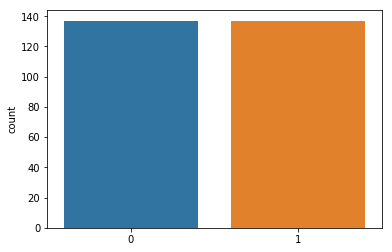

In [58]:
from imblearn.under_sampling import RandomUnderSampler

#Code starts here
# Create random under sampler object
rus = RandomUnderSampler(random_state=0)

#Undersampling the train data
X_sample2, y_sample2 =  rus.fit_sample(X_train, y_train)
sns.countplot(y_sample2)

#Initiating a logistic regression model
model_rus = LogisticRegression(random_state=0)

#Fitting the model with sampled data
model_rus.fit(X_sample2, y_sample2)

#Making prediction of test values
y_pred=model_rus.predict(X_test)

#Finding the accuracy score
accuracy_rus=model_rus.score(X_test,y_test)
print("Accuracy:",accuracy_rus)       

#Finding the recall score
recall_rus=recall_score(y_test, y_pred)
print ("recall:",recall_rus)

#Finding the precision score
precision_rus=precision_score(y_test, y_pred)
print ("precision:",precision_rus)

#Finding the f1 score
f1_rus=f1_score(y_test, y_pred)
print ("f1_score:", f1_rus)

#Finding the confusion matrix
confusion_mat_rus=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",confusion_mat_rus)

#Code starts here

## 3.3 Cluster Centroids
***
This technique undersamples by replacing a cluster of majority samples.

This method first finds the clusters of majority class with K-means algorithms.(You will learn about clustering algorithms later)

In brief, what K-means algorithm does is, groups data points into `K` different groups(or clusters).


Following is an example of data being clustered into 3 different clusters :

![](../images/k_means.jpg)

In cluster centroid undersampling,  only the cluster centroids(mid-points) of the K clusters are kept and considered as the new majority samples.    


For e.g.

Suppose you had a dataset where: 
    
    * Size of minority class: 200
    
    * Size of majority class: 1000
    

Cluster centroids method works by creating 200(size of minority class) clusters of the majority class and returning the centroids of each of the clusters. 

Hence, rather than sampling from the original data points we get new representative sample. 


![cluster_centroid](../images/cluster_centroid.png)


**Python Implementation**

```python
import matplotlib.pyplot as plt
from imblearn.under_sampling import ClusterCentroids
    
#Dataset creation
X, y = create_dataset(n_samples=5000, weights=(0.01, 0.05, 0.94), class_sep=0.8)   ###

                                
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

clf = make_pipeline(sampler, LinearSVC())                                  ###
clf.fit(X, y)

plot_decision_function(X, y, clf, ax1)                                     ###
ax1.set_title('Original datapoints')


#Cluster Centroids object
sampler = ClusterCentroids(random_state=0)

#Fitting and transforming data points
X_res, y_res = sampler.fit_sample(X, y)

#Plotting them
plot_resampling(X_res, y_res, ax2)                                         ###
ax2.set_title('Resampling using {}'.format(sampler.__class__.__name__))
fig.tight_layout()
    
```
**Output**


![](../images/cc_2.png)


**To know the working of functions accompanied by '###' , you can check out the [imblearn documentation](https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/under-sampling/plot_comparison_under_sampling.html#sphx-glr-auto-examples-under-sampling-plot-comparison-under-sampling-py)**


**Drawback:**

This method though theoretically is better at choosing than random undersampling, it results in creation of new datapoints(which at times not capture all the information) and hence results in indirect information loss.


# Task : Cluster Centroids

Let's now try to see if cluster centroids will fare better than random undersampling.

## Instructions

- Initialise a `ClusterCentroids()` object with `random_state=0` and save it to a variable called `'cc'`.


- Using `fit_sample()` method of `'cc'`, undersample `'X_train'` and `'y_train'` and store the new samples in variables `'X_sample3'` and `'y_sample3'`.


- Initialise a logistic regression model with `LogisticRegression()` with `random_state=0` and save it to a variable called `'model_cc'`.


- Fit the model on the training data `'X_sample3'` and `'y_sample3'` using the `'fit()'` method.

- Store the prediction of `'X_test'` by `'model_cc'` in a variable called `'y_pred'`

- Find out the accuracy between `X_test` and `'y_test'` using the `'score()'` method and save it in a variable called `'accuracy_cc'`


- Find out the recall score between `y_test` and `'y_pred'` using the `'recall_score()'` method and store it in a variable called `'recall_cc'`

- Find out the precision score between `y_test` and `'y_pred'` using the `'precision_score()'` method and store it in a variable called `'precision_cc'`


- Find out the f1 score between `y_test` and `'y_pred'` using the `'f1_score()'` method and store it in a variable called `'f1_cc'`

- Find out the confusion matrix between `y_test` and `'y_pred'` using the `'confusion_matrix()'` method and store it in a variable called `'confusion_mat_cc'`

## Note: Will take time

Accuracy: 0.894870819557012
recall: 0.9661016949152542
precision: 0.015625
f1_score: 0.03075263015915835
Confusion Matrix:
 [[30527  3591]
 [    2    57]]


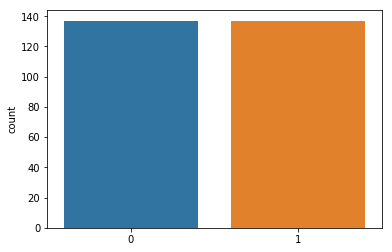

In [59]:


from imblearn.under_sampling import ClusterCentroids


#Code starts here

#Initialising the cluster centroid model
cc = ClusterCentroids(random_state=0)

#Undersampling the data using cluster centroids
X_sample3, y_sample3 = cc.fit_sample(X_train, y_train)
sns.countplot(y_sample3)


#Initialising logistic regression model
model_cc = LogisticRegression(random_state=0)

#Fitting the model with sampled data
model_cc.fit(X_sample3, y_sample3)

#Making predictions on test data
y_pred=model_cc.predict(X_test)

#Finding the accuracy score
accuracy_cc=model_cc.score(X_test,y_test)
print("Accuracy:",accuracy_cc)       

#Finding the recall score
recall_cc=recall_score(y_test, y_pred)
print ("recall:",recall_cc)

#Finding the precision score
precision_cc=precision_score(y_test, y_pred)
print ("precision:",precision_cc)

#Finding the f1 score
f1_cc=f1_score(y_test, y_pred)
print ("f1_score:", f1_cc)

#Finding the confusion matrix
confusion_mat_cc=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",confusion_mat_cc)

#Code ends here

# 3.4 Tomek Undersampling

**Definition**

Another way of undersampling the majority class is using 'Tomek Links'.

Tomek Links are pairs of instances of opposite classes who are their own nearest neighbors.

![](../images/tomek_1.jpeg)

This technique of undersampling identifies Tomek Links and gets rid of the majority samples.
The idea is to clarify the border between the minority and majority classes, making the minority region(s) more distinct. 


![](../images/tomek_2.jpeg)


In the above diagram, `+` is the majority class and `O` is the minority class. Tomek links of `O` are identified and removed, thereby making it easier to define the minority class region of `+`.


**Python Implementation**
```python
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks 

#Creation of synthetic dataset
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

#Original dataset target variable
print('Distribution of target variable before Tomek Sampling:', Counter(y))

#Tomeklink object creation
tomek = TomekLinks()

#Tomek Undersampling
X_sample, y_sample = tomek.fit_sample(X, y)

#After Tomek 
print('\nDistribution of target variable after Tomek Sampling:', Counter(y_sample))


```

**Output**

```python
Distribution of target variable before Tomek Sampling: Counter({1: 900, 0: 100})

Distribution of target variable after Tomek Sampling: Counter({1: 897, 0: 100})

```



# Task: Tomek Undersampling

Let's see how well our model performs when we undersample using Tomek Links

## Instructions

- Initialise a `TomekLinks()` object with `random_state=0` and save it to a variable called `'tl'`.


- Using `fit_sample()` method of `'tl'`, undersample `'X_train'` and `'y_train'` and store the new samples in variables `'X_sample4'` and `'y_sample4'`.


- Initialise a logistic regression model with `LogisticRegression()` with `random_state=0` and save it to a variable called `'model_tl'`.


- Fit the model on the training data `'X_sample4'` and `'y_sample4'` using the `'fit()'` method.

- Store the prediction of `'X_test'` by `'model_tl'` in a variable called `'y_pred'`

- Find out the accuracy between `X_test` and `'y_test'` using the `'score()'` method and save it in a variable called `'accuracy_tl'`


- Find out the recall score between `y_test` and `'y_pred'` using the `'recall_score()'` method and store it in a variable called `'recall_tl'`

- Find out the precision score between `y_test` and `'y_pred'` using the `'precision_score()'` method and store it in a variable called `'precision_tl'`


- Find out the f1 score between `y_test` and `'y_pred'` using the `'f1_score()'` method and store it in a variable called `'f1_tl'`

- Find out the confusion matrix between `y_test` and `'y_pred'` using the `'confusion_matrix()'` method and store it in a variable called `'confusion_mat_tl'`


**Drawback:**

This method is effective owing to its creation of better decision but if decision boundary is not clear it can result in removal of lot of samples.


Accuracy: 0.999473330017263
recall: 0.7796610169491526
precision: 0.9019607843137255
f1_score: 0.8363636363636364
Confusion Matrix:
 [[34113     5]
 [   13    46]]


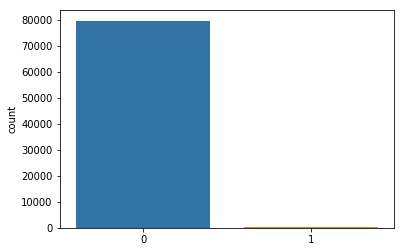

In [60]:

from imblearn.under_sampling import TomekLinks

#Code starts here

#Initialising Tomek Links object
tl = TomekLinks(random_state=0)

#Undersamlpling the train data
X_sample4, y_sample4 = tl.fit_sample(X_train, y_train)
sns.countplot(y_sample4)

#Initialising the logistic regression model
model_tl = LogisticRegression(random_state=0)

#Fitting the model with sampled data
model_tl.fit(X_sample4, y_sample4)

#Making the predictions with test data
y_pred=model_tl.predict(X_test)

#Finding the accuracy score
accuracy_tl=model_tl.score(X_test,y_test)
print("Accuracy:",accuracy_tl)       

#Finding the recall score
recall_tl=recall_score(y_test, y_pred)
print ("recall:",recall_tl)

#Finding the precision score
precision_tl=precision_score(y_test, y_pred)
print ("precision:",precision_tl)

#Finding the f1 score
f1_tl=f1_score(y_test, y_pred)
print ("f1_score:", f1_tl)

#Finding the confusion matrix
confusion_mat_tl=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",confusion_mat_tl)

#Code ends here

# Chapter 4: Oversampling

## 4.1 What is Oversampling?

As opposed to undersamping, oversampling techniques try to make the classes balanced by enhancing the minority class using different techniques.

![](../images/image29.png)

There are different approaches with which you can oversample. 

Few of the popular ones include:

* Random Oversampling

* SMOTE



## 4.2 Random Oversampling

Opposite to Random Undersampling, in Random Oversampling minority class samples are selected with replacement(repeated occurences) resulting in higher proportion of minority class samples.


![ros](../images/ros.png)


Let's understand better with numerical examples

**Example 1**

* Total number of observations: 1000
* Total number of classes: 2 (A, B)
* Size of class A: 975
* Size of class B: 25
* Proportion of Minor class: 2.5%


Sampled Dataset
* From A, select all 975 points
* From B, select 225 points with replacement
* Proportion of Minor class: 18.75%


**Example 2**

* Total number of observations: 1000
* Total number of classes: 3 (A, B, C)
* Size of class A: 925
* Size of class B: 25
* Size of class C: 50
* Proportion of Minor classes: 2.5% (B) and 5% (C)

**Sampled Dataset**
* From A, select all 925 points
* From B, select 225 points with replacement
* From C, select 450 points with replacement
* Proportion of Minor class: ~14% (B) and ~28% (C)



**Python implementation**

```python
import numpy as np
from imblearn.over_sampling import RandomOverSampler
lis=np.zeros(970)

y= np.ones(40) 

d=np.append(lis,y)

e=np.asarray(list(range(0,len(lis)+len(y))))
DF=pd.DataFrame({'Feature':e,'Class':d})

# Before sampling 
print('\nDistribution of target variable before Random OverSampling:', Counter(DF['Class']))

ros = RandomOverSampler(random_state=0)

x_sample,y_sample =  ros.fit_sample(DF['Feature'].values.reshape(-1,1),DF['Class'])
    
    
#After Sampling    
print('\nDistribution of target variable after Random OverSampling:', Counter(y_sample))
    
```
**Output**

```python
Distribution of target variable before Random OverSampling: Counter({0.0: 970, 1.0: 40})

Distribution of target variable after Random OverSampling: Counter({0.0: 970, 1.0: 970})
```

**Drawback:**

Unlike random undersampling, no info loss happens. But in random oversampling(where the training and validation set contain the same sample) we can easily end up overfitting and having misleading results.

# Task: Random Oversampling

As mentioned, Oversampling has an advantage over undersampling in the form of no information loss.
Let's see if our logistic regression model works better after random oversampling

## Instructions

- Initialise a `RandomOverSampler()` object with `random_state=0` and save it to a variable called `'ros'`.


- Using `fit_sample()` method of `'ros'`, undersample `'X_train'` and `'y_train'` and store the new samples in variables `'X_sample5'` and `'y_sample5'`.


- Initialise a logistic regression model with `LogisticRegression()` with `random_state=0` and save it to a variable called `'model_ros'`.


- Fit the model on the training data `'X_sample5'` and `'y_sample5'` using the `'fit()'` method.

- Store the prediction of `'X_test'` by `'model_ros'` in a variable called `'y_pred'`

- Find out the accuracy between `X_test` and `'y_test'` using the `'score()'` method and save it in a variable called `'accuracy_ros'`


- Find out the recall score between `y_test` and `'y_pred'` using the `'recall_score()'` method and store it in a variable called `'recall_ros'`


- Find out the precision score between `y_test` and `'y_pred'` using the `'precision_score()'` method and store it in a variable called `'precision_ros'`


- Find out the f1 score between `y_test` and `'y_pred'` using the `'f1_score()'` method and store it in a variable called `'f1_ros'`

- Find out the confusion matrix between `y_test` and `'y_pred'` using the `'confusion_matrix()'` method and store it in a variable called `'confusion_mat_ros'`



Accuracy: 0.9753402853364231
recall: 0.891156462585034
precision: 0.05895589558955896
f1_score: 0.11059518784297172
Confusion Matrix:
 [[83205  2091]
 [   16   131]]


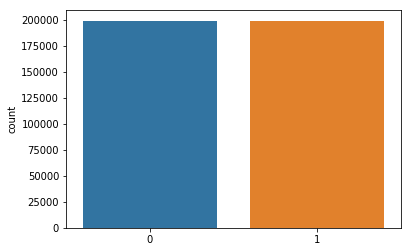

In [47]:
from imblearn.over_sampling import RandomOverSampler

#Code starts here

#Initialising the random over sampler object
ros = RandomOverSampler(random_state=0)

#Sampling the train data using random over sampling method
X_sample5, y_sample5 = ros.fit_sample(X_train, y_train)
sns.countplot(y_sample5)

#Initialising a logsitic regression model
model_ros = LogisticRegression(random_state=0)

#Fitting the model with train data
model_ros.fit(X_sample5, y_sample5)

#Making predictions of the train data
y_pred=model_ros.predict(X_test)

#Finding the accuracy score
accuracy_ros=model_ros.score(X_test,y_test)
print("Accuracy:",accuracy_ros)       

#Finding the recall score
recall_ros=recall_score(y_test, y_pred)
print ("recall:",recall_ros)

#Finding the precison score
precision_ros=precision_score(y_test, y_pred)
print ("precision:",precision_ros)

#Finding the f1 score
f1_ros=f1_score(y_test, y_pred)
print ("f1_score:", f1_ros)

#Finding the confusion matrix 
confusion_mat_ros=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",confusion_mat_ros)

#Code ends here

## 4.3 SMOTE (Synthetic Minority Oversampling Technique)


This method was introduced in the paper: [SMOTE: Synthetic Minority Over-sampling Technique](https://arxiv.org/pdf/1106.1813.pdf)


**Definition**

In this technique, the minority class is over-sampled by creating synthetic examples rather than by over-sampling with replacement. It does it by generating synthetic examples in a less application-specific manner i.e. by operating in feature space rather than data space.

That way minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbors.


**Working**
***
![](../images/image32.png)



***

Given the following data distribution:

![](../images/smote_1.png)

Step 1: Ignore the majority class


![](../images/smote_2.png)

Step 2: Select one of the minority samples and chose its k nearest neighbours(or points)


![](../images/smote_3.png)

Depending upon the amount of over-sampling required, neighbors from the k nearest neighbors are randomly chosen.
For instance, if the amount of over-sampling needed is 200%, only two neighbors from the five nearest neighbors are chosen and one sample is generated in the direction of each.


**NOTE:** this k becomes a hyperparameter for SMOTE algorithm

Step 3: SMOTE draws lines between existing minority instances like this.


![](../images/smote_5.png)

Step 4: SMOTE then imagines new, synthetic minority instances somewhere on these lines.


![](../images/smote_6.png)

Step 5: Repeat steps 2-4 for all the minority points


**Python Implementation**

```python
import matplotlib.pyplot as plt
from imblearn.under_sampling import ClusterCentroids
    
#Dataset creation
X, y = create_dataset(n_samples=10000, weights=(0.01, 0.05, 0.94))   ###

                                
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

clf = make_pipeline(sampler, LinearSVC())                                  ###
clf.fit(X, y)

plot_decision_function(X, y, clf, ax1)                                     ###
ax1.set_title('Original datapoints')


#SMOTE object
sampler = SMOTE(random_state=0)

#Fitting and transforming data points
X_res, y_res = sampler.fit_sample(X, y)

#Plotting them
plot_resampling(X_res, y_res, ax2)                                         ###
ax2.set_title('Resampling using {}'.format(sampler.__class__.__name__))
fig.tight_layout()



```

**Output**
![SMOTE](../images/smote.png)


**Drawback:**

Because it operates by interpolating between rare examples, it can only generate examples within the body of available examples—never outside.

# Task: SMOTE Sampling

Let's see if an advanced technique like SMOTE gives a better performance.


## Instructions

- Initialise a `SMOTE()` object with `random_state=0` and save it to a variable called `'smote'`.


- Using `fit_sample()` method of `'smote'`, undersample `'X_train'` and `'y_train'` and store the new samples in variables `'X_sample6'` and `'y_sample6'`.


- Initialise a logistic regression model with `LogisticRegression()` with `random_state=0` and save it to a variable called `'model_smote'`.


- Fit the model on the training data `'X_sample6'` and `'y_sample6'` using the `'fit()'` method.

- Store the prediction of `'X_test'` by `'model_smote'` in a variable called `'y_pred'`

- Find out the accuracy between `X_test` and `'y_test'` using the `'score()'` method and save it in a variable called `'accuracy_smote'`


- Find out the recall score between `y_test` and `'y_pred'` using the `'recall_score()'` method and store it in a variable called `'recall_smote'`

- Find out the precision score between `y_test` and `'y_pred'` using the `'precision_score()'` method and store it in a variable called `'precision_smote'`


- Find out the f1 score between `y_test` and `'y_pred'` using the `'f1_score()'` method and store it in a variable called `'f1_smote'`

- Find out the confusion matrix between `y_test` and `'y_pred'` using the `'confusion_matrix()'` method and store it in a variable called `'confusion_mat_smote'`



Accuracy: 0.9842936226490174
recall: 0.8843537414965986
precision: 0.08934707903780069
f1_score: 0.16229712858926343
Confusion Matrix:
 [[83971  1325]
 [   17   130]]


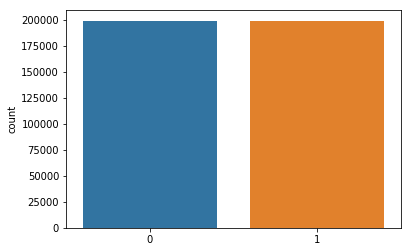

In [48]:
from imblearn.over_sampling import SMOTE


#Code starts here

#Initialising a SMOTE object
smote = SMOTE(random_state=0)

#Sampling the data using SMOTE
X_sample6, y_sample6 = smote.fit_sample(X_train, y_train)
sns.countplot(y_sample6)

#Initialising Logistic Regression model
model_smote = LogisticRegression(random_state=0)

#Fitting the model on train data
model_smote.fit(X_sample6, y_sample6)

#Making predictions on test data
y_pred=model_smote.predict(X_test)

#Finding the accuracy score 
accuracy_smote=model_smote.score(X_test,y_test)
print("Accuracy:",accuracy_smote)       


#Finding the recall score
recall_smote=recall_score(y_test, y_pred)
print ("recall:",recall_smote)

#Finding the precision score
precision_smote=precision_score(y_test, y_pred)
print ("precision:",precision_smote)

#Finding the f1 score
f1_smote=f1_score(y_test, y_pred)
print ("f1_score:", f1_smote)

#Finding the confusion matrix
confusion_mat_smote=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",confusion_mat_smote)

#Code ends here

## 4.4 Summary

Before we go ahead to the next chapter, let's summarise the performance of all resampling methods for our credit card problem.

|Resampling Method|Accuracy|Precision|Recall|F1 Score|
|-----|-----|-----|-----|----|
|None|0.99|0.89|0.69|0.78|
|Random Undersampling|0.96|0.04|0.92|0.08|
|Cluster Centroids|0.89|0.02|0.97|0.03|
|Tomek Links|0.99|0.90|0.78|0.83|
|Random Oversampling|0.98|0.06|0.89|0.11|
|SMOTE|0.98|0.09|0.88|0.16|

**Things to ponder**

1. Despite having **similar accuracy** scores, you can clearly see how different their **precision** and **recall** scores are.


2. Recall is the highest in Cluster Centroids. So is that the best resampling method for our problem?


3. Someone tells you Tomek Links looks like the best resampling method for our problem. Do you agree or disagree? Why?

The importance of knowing which sampling method to use is as important knowing if using sampling methods will achieve increase in model performance. 

As a thumb rule, use sampling methods only when you have `enough` and `varied` samples of minority class.
Sampling usually helps when the model is biased towards majority class despite having a good sample of minority class. It's wishful thinking to assume sampling methods will magically improve the quality of minority target class. 



# Chapter 5: Algorithmic Approach
***

## 5.1 Different Algorithmic approaches

Algorithmic approach involves using different techniques to tweak the algorithms and make them learn minority classes 

Some of them include:

- Cost Sensitive Training (Penalised Training)

- Choice of Algorithm



**Cost Sensitive Training (Penalised Training):** 
***

This step involves creating a custom metric which penalizes wrong predictions in the minority class.

For eg:

For our credit card problem, since false negative is more undesirable than false positive, our metric could be something like:
* metric=(5 ∗ false negative + 1 ∗ false positive) / 6

Such metrics could be used in handling the imbalanced datasets and [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) provides a method to device custom metrics.

**Choice of Algorithm:**
***
Ensemble methods, especially Random Forests are found to be good at handling imbalanced datasets. These methods are able to learn classes based on importance assigned to them.

Sklearn's implementations of these algorithms provides option to handle imbalanced dataset by setting the **`class_weight`** parameter.

```python
#Creating list of class weights
class_wts = range(50)

f1s = []
auc = []
#Loop to iterate different weights to the minority class(1) 
for wt in class_wts:
    rf7 = RandomForestClassifier(random_state=0, class_weight={0:1,1:wt})
    rf7.fit(X_train, y_train)
    f1s.append(f1_score(y_test, rf7.predict(X_test)))
    auc.append(roc_auc_score(y_test, rf7.predict(X_test)))
    
    
#Selecting the max f1 score    
max_scorer = f1s.index(np.max(f1s))

#Selecting the model with the max score
rf7 = RandomForestClassifier(random_state=9, class_weight={0:1,1:max_scorer})
rf7.fit(X_train, y_train)

print ("F1 score:", f1_score(y_test, rf7.predict(X_test)))
print ("Precision:",precision_score(y_test, rf7.predict(X_test)))
print ("Recall:",recall_score(y_test, rf7.predict(X_test)))
print ("ROC Score:",roc_auc_score(y_test, rf7.predict(X_test)))
print ("Confusion Matrix:\n",confusion_matrix(y_test, rf7.predict(X_test)))

plt.figure(figsize=(10, 8))
plt.plot(class_wts, f1s, label="F1 scores")
plt.plot(class_wts, auc, label="AUC scores")
plt.xlabel("class weight")
plt.ylabel("scores")
plt.title("Effect of Class Wt. in Imbalanced Classes")
plt.ylim(0.45,1)
plt.legend()
plt.show()
```

**Output**

```python
F1 score: 0.8095238095238095

Precision: 0.8947368421052632

Recall: 0.7391304347826086

ROC Score: 0.8694948840110821

Confusion Matrix:
[[14216     2]
 [    6    17]]

```

![class_wt](../images/class_wt.png)


**Other useful tips**
***

* While carrying out cross-validation, make stratified folds to make sure the presence of minority class in all folds.


* Instead of predictions, get probabilities from the trained classifier. 


* Study the AUC-ROC curve and adjust the prediction threshold.


Phew! That's a lot of imbalance-data handling methods to onboard. 


Even then, there are a lot more techniques that can be employed. 

So, if you do struggle, it might be worth checking out `imblearn's` [official documentation](https://imbalanced-learn.readthedocs.io/en/stable/index.html).


# Chapter 6 :Other Challenges

## 6.1 Handling Other Challenges 
After concluding the discussion on imbalanced datasets, let's discuss other challenges that might pop up.

**6.1 Dealing with Smaller Datasets:**
***

Sometimes, challenge arises not because of too much data, but because of too less data. Such a scenario is known as  **the curse of dimensionality**, which essentially means **number of features >> number of observations**

In case of such small datasets, following are some of the techniques that could come in handy
    
    * Exploit Bootstrapping
    
    * Use Simpler, Regularized Models
    
    * Use Ensemble Techniques(Discussed in the next modules)
    
    * Use Support Vector Machines(Discussed in next modules)
    
    
**6.2 Value of K in K-Folds**

One challenge also arises in deciding the value of k in k-fold validation.

***
Why do we use cross-validation?

Cross Validation is used to assess the predictive performance of the models by testing it on unseen data or test data

The motivation to use cross validation techniques is that when we fit a model, we are fitting it to a training dataset. Without cross validation we only have information on how does our model perform to our in-sample data. Ideally we would like to see how does the model perform when we have a new data in terms of accuracy of its predictions. 
***
***
What is K-Fold validation?

It's a form of cross validation where a given data sample is split into k number of groups.


Following are it's steps

- Split the dataset into k groups


- For each unique group:

    - Take that group as a hold out or test data set
    
    - Take the remaining groups as a training data set
    
    - Fit the specific model on the training set and evaluate it on the test set
    
    - Retain the evaluation score and discard the model
    
    - Aggregate all the evaluation scores to summarize
    
    
![k-folds](../images/kfold.png)    

***
The problem that comes with choosing 'k' is the tradeoff:


* Higher K: More samples to train, more cross-validation, results in less bias, high variance but requires more computations


* Lower K: Less samples to train, less cross-validation, results in more bias, low variance but requires less computations


According to paper [A Study of Cross Validation and Bootstrap for Accuracy Estimation and Model Selection](http://robotics.stanford.edu/~ronnyk/accEst.pdf), value of k=10 is a good balance between accuracy and training time.

**6.3. Optimum Algorithm**

Age old question of 'Which Algorithm to use' is only rivalled by 'What to eat for dinner?'


Studying a bunch of algorithms is fascinating and interesting, but choosing which one to use is not! 

Let's understand which algorithms perform better in which scenarios.

***
**A perspective from a research paper**


In [this](http://jmlr.org/papers/volume15/delgado14a/delgado14a.pdf) paper, the researchers evaluated **179 classifiers** arising from **17 families**, implemented in Weka, R, C and Matlab.

They used **121 datasets**, which represent the whole UCI database and other real problems, in order to achieve significant conclusions about the classifier behavior, not dependent on the data set collection.


**Key Findings:**

* The classifiers most likely to outperform are the random forest (RF) versions, the best of which achieves 94.1% of the maximum accuracy overcoming 90% in the 84.3% (102 out of 121) of the data sets.


* The SVM with Gaussian kernel achieves 92.3% of the maximum accuracy.

**Paper Summary**

The random forest was found to be clearly the best family of classifiers (3 out of 5 best classifiers are RF), followed by SVM (4 classifiers in the top-10), neural networks and boosting ensembles (5 and 3 members in the top-20 respectively).

***

**Practical Tips**

So far from the bunch of algorithms we have learnt, they are of two types.

* Linear Models
* Ensemble Models



The question is then which algorithm to use and when? Let’s have a look at some quick ideas


One useful way to decide is using the below chart of `Size v Complexity`

![](../images/image35.png)



Still, let's understand in a little more detail, the pros and cons of each.

###### Linear Models

Penalized linear methods have the advantage that they train very quickly. That helps us for 2 reasons

* Training times on large data sets can extend to hours, days, or even weeks.

* Long training times can stall development and deployment on large problems.

Training usually needs to be done several times before a deployable solution is arrived at. Hence, rapid training time for penalized linear methods makes them useful for the obvious reason that shorter is better. However, depending on the problem, these methods may suffer some performance disadvantages relative to ensemble methods.


Therefore, penalized linear methods can be a useful first step in your development process even in the circumstance where they yield inferior performance to ensemble methods.


###### Ensemble Methods

Ensemble methods, on the other hand, bring to the table the ability to work with nonlinear data.
We can also easily control the complexity of ensemble models by tuning the hyperparameters


Also, ensemble methods come with the ability to tell apart important features from relatively redundant ones(Huge advantage of ensemble methods)


Hence, ensemble methods could be used as the final predictors after feature engineering and feature selection has been carried out.

Following is a useful chart that summarises the above points

![](../images/image34.png)



# END OF NOTEBOOK